In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

import datetime as dt

# LAPD DATA PROJECT

In this project, I want to evaluate the LAPD Data Calls for Service data of January 1st to January 22th of 2023 in the Los Angles city. I plan to visualize trends in crime activity by diving into location, time, and type of crimes being reported via telecom. 

### Loading and Understanding the Data
* Dataframe shape
* Data Types
* Head & Tail

In [3]:
#Load Data Set
df = pd.read_csv('LAPD_Calls_for_Service_2023.csv')

In [4]:
df.shape

(93732, 7)

In [5]:
df.head(10)

,Incident_Number,Area_Occ,Rpt_Dist,Dispatch_Date,Dispatch_Time,Call_Type_Code,Call_Type_Text
0,PD23012600000036,Mission,1983.0,01/26/2023 12:00:00 AM,00:14:56,415M,415 MAN
1,PD23012600000040,Outside,NaN,01/26/2023 12:00:00 AM,00:14:32,006,CODE 6
2,PD23012600000021,Rampart,246.0,01/26/2023 12:00:00 AM,00:14:28,907A2,907 AMB O/D
3,PD23012500004931,Rampart,256.0,01/26/2023 12:00:00 AM,00:14:25,242J,242 J/O
4,PD23012600000039,Outside,NaN,01/26/2023 12:00:00 AM,00:14:18,006,CODE 6
5,PD23012600000038,Outside,NaN,01/26/2023 12:00:00 AM,00:14:17,902,902 TRAFFIC STOP
6,PD23012600000034,Northeast,1132.0,01/26/2023 12:00:00 AM,00:13:13,930M,930 MAN
7,PD23012600000027,Topanga,2146.0,01/26/2023 12:00:00 AM,00:12:52,9049,904 REFUSING ID
8,PD23012600000037,Outside,NaN,01/26/2023 12:00:00 AM,00:12:49,902,902 TRAFFIC STOP
9,PD23012600000031,Southeast,1822.0,01/26/2023 12:00:00 AM,00:12:17,415GF,415 GROUP FIGHT


In [6]:
df.tail(10)

,Incident_Number,Area_Occ,Rpt_Dist,Dispatch_Date,Dispatch_Time,Call_Type_Code,Call_Type_Text
93722,PD22123100003987,Southwest,373.0,01/01/2023 12:00:00 AM,00:05:27,9046,904 DUI INVD
93723,PD23010100000019,Outside,NaN,01/01/2023 12:00:00 AM,00:05:24,006,CODE 6
93724,PD23010100000009,Hollywood,678.0,01/01/2023 12:00:00 AM,00:04:54,9065,906 VISUAL (C30 VICT
93725,PD23010100000013,Southeast,1846.0,01/01/2023 12:00:00 AM,00:04:38,990,990 BACK-UP
93726,PD23010100000010,N Hollywood,1548.0,01/01/2023 12:00:00 AM,00:03:57,246H,246 HEARD ONLY
93727,PD22123100004000,Mission,1983.0,01/01/2023 12:00:00 AM,00:03:47,242S,242 SUSP
93728,PD23010100000001,Wilshire,701.0,01/01/2023 12:00:00 AM,00:02:14,9065,906 VISUAL (C30 VICT
93729,PD23010100000004,Devonshire,1781.0,01/01/2023 12:00:00 AM,00:02:08,006,CODE 6
93730,PD23010100000003,Outside,NaN,01/01/2023 12:00:00 AM,00:02:07,006,CODE 6
93731,PD23010100000002,Outside,NaN,01/01/2023 12:00:00 AM,00:01:43,006,CODE 6


In [7]:
df.dtypes

Incident_Number     object
Area_Occ            object
Rpt_Dist           float64
Dispatch_Date       object
Dispatch_Time       object
Call_Type_Code      object
Call_Type_Text      object
dtype: object

In [8]:
df.describe()

,Rpt_Dist
count,60829.000000
mean,1117.091075
std,606.929315
min,101.000000
25%,622.000000
50%,1139.000000
75%,1623.000000
max,2198.000000


### Prepping the Data

* Dropping irrelevant columns and rows
* Identifying duplicated columns
* Renaming Columns
* Feature Creation

In [9]:
df.head()

,Incident_Number,Area_Occ,Rpt_Dist,Dispatch_Date,Dispatch_Time,Call_Type_Code,Call_Type_Text
0,PD23012600000036,Mission,1983.0,01/26/2023 12:00:00 AM,00:14:56,415M,415 MAN
1,PD23012600000040,Outside,NaN,01/26/2023 12:00:00 AM,00:14:32,006,CODE 6
2,PD23012600000021,Rampart,246.0,01/26/2023 12:00:00 AM,00:14:28,907A2,907 AMB O/D
3,PD23012500004931,Rampart,256.0,01/26/2023 12:00:00 AM,00:14:25,242J,242 J/O
4,PD23012600000039,Outside,NaN,01/26/2023 12:00:00 AM,00:14:18,006,CODE 6


In [10]:
# Checking columns for NA's
df.isna().sum()

Incident_Number        0
Area_Occ               0
Rpt_Dist           32903
Dispatch_Date          0
Dispatch_Time          0
Call_Type_Code         0
Call_Type_Text         0
dtype: int64

In [11]:
# Checking NA percentage
df['Rpt_Dist'].isna().sum() / len(df) * 100

35.10327316178039

In [12]:
# Checking for any duplicates
df['Incident_Number'].duplicated().sum()

0

In [13]:
# Dropping columns Incident_Number and Rpt_Dist
df.drop(['Incident_Number','Rpt_Dist'],axis = 1 , inplace = True)

In [14]:
# Dispatch_Date Type changed to datetime
df['Dispatch_Date'] = pd.to_datetime(df['Dispatch_Date'])

In [15]:
# Creating a new column by extracting date information to retrieve day of the week
df['Day'] = df['Dispatch_Date'].dt.day_name().str[:3]

In [16]:
# Creating a new column by extracting hourly information from date_time
df['Hour'] = df['Dispatch_Time'].str[:2]

In [17]:
# Changin Hour type from Obj to a str then an int
df['Hour'] = df['Hour'].astype(str).astype(int)

In [18]:
# Renaming area_occ to Location

df.rename(columns = {'Area_Occ':'Location'}, inplace = True)

In [19]:
# Removing int from call_type_text column

#df['Call_Type_Text'].str.replace('\d+', '')

In [20]:
# Removing rows greater than date 1/22 so we can have only three complete weeks of data

filt = df['Dispatch_Date'] > '2023-01-22'
df.drop(index = df[filt].index, inplace = True)

In [21]:
morning = np.arange(5,12)
afternoon = np.arange(12,17)
evening = np.arange(17,21)
night = [21,22,23,0,1,2,3,4,5]

In [22]:
conditions = [
    (df['Hour'].isin(morning)),
    (df['Hour'].isin(afternoon)),
    (df['Hour'].isin(evening)),
    (df['Hour'].isin(night))
]

In [23]:
values = ['Morning','Afternoon','Evening','Night']

In [24]:
# Creating new row for part of day using conditions and values on the Hour Column using np.select

df['Part_of_Day'] = np.select(conditions,values)

In [25]:
df.head()

,Location,Dispatch_Date,Dispatch_Time,Call_Type_Code,Call_Type_Text,Day,Hour,Part_of_Day
12831,Foothill,2023-01-22,23:59:57,006,CODE 6,Sun,23,Night
12832,Olympic,2023-01-22,23:59:47,245S,245 SUSP,Sun,23,Night
12833,Mission,2023-01-22,23:59:43,906B1,906 CODE 30 RINGER,Sun,23,Night
12834,N Hollywood,2023-01-22,23:59:42,620D,620 DOM VIOL,Sun,23,Night
12835,Wilshire,2023-01-22,23:58:07,620D,620 DOM VIOL,Sun,23,Night


### Feature Understanding and Relationships

* Plotting Distributions(Histogram & KDE)
* Count Plots
* Groupby Comparisons

In [26]:
df['Day'].value_counts()

Sun    13969
Wed    11715
Thu    11617
Fri    11501
Tue    11373
Sat    10591
Mon    10135
Name: Day, dtype: int64

Text(0, 0.5, 'Count')

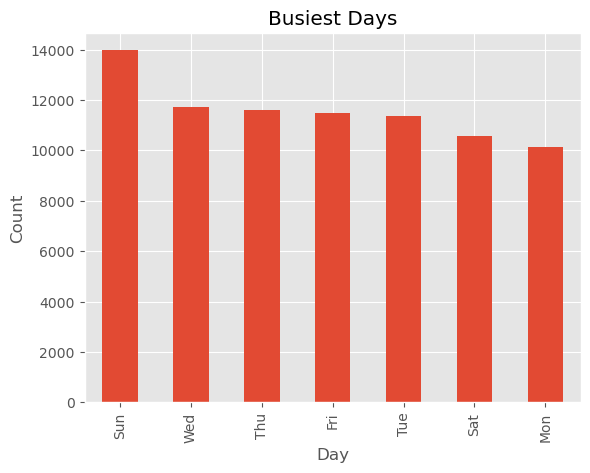

In [27]:
# Barplot: Count of most calls for each day in a span of 3 weeks.

ax = df['Day'].value_counts() \
    .plot(kind = 'bar', title = 'Busiest Days')
ax.set_xlabel('Day')
ax.set_ylabel('Count')

Text(0.5, 0, 'Hour (Army Time)')

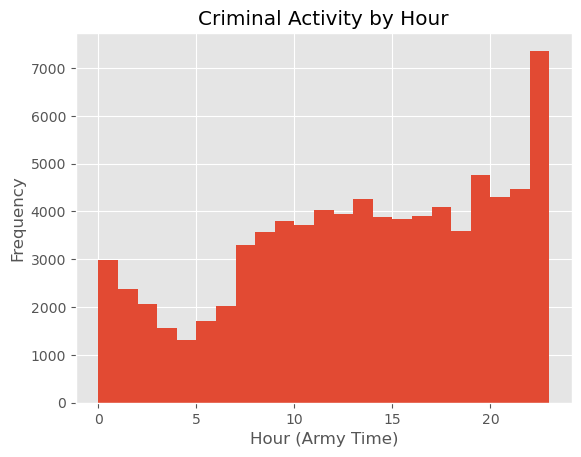

In [28]:
# Histogram : To illustrate the distribution of data for calls per hour

ax = df['Hour'].plot(kind = 'hist',
               bins = 23,
               title = 'Criminal Activity by Hour')
ax.set_xlabel('Hour (Army Time)')

Text(0.5, 0, 'Hour (Army Time)')

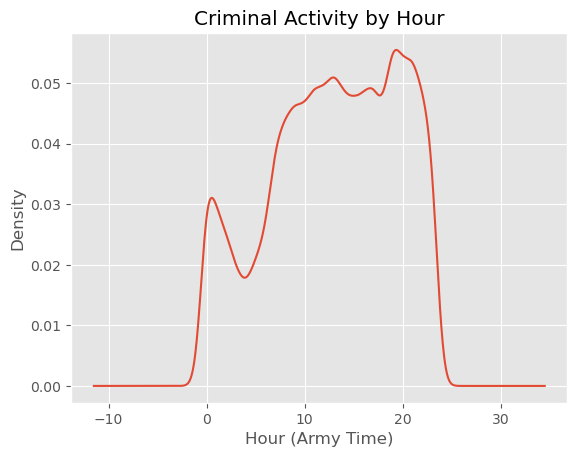

In [29]:
#KDE Plot: Probability density funciton for amount of calls occuring during each hour.

ax = df['Hour'].plot(kind = 'kde',
               title = 'Criminal Activity by Hour')
ax.set_xlabel('Hour (Army Time)')

Text(0.5, 1.0, 'Daily Average 911 Call Times')

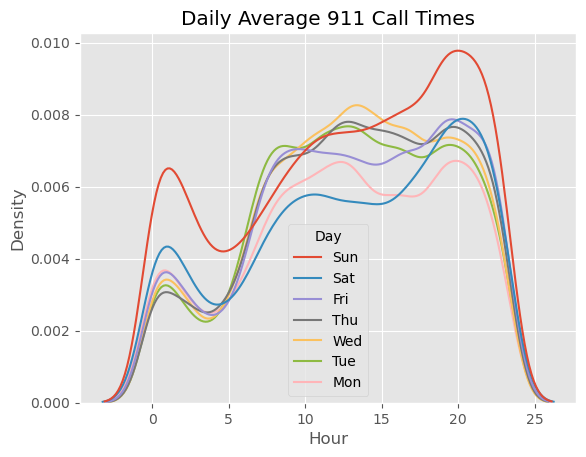

In [30]:
# KDE Plot: Probability density funciton for amount of calls occuring during each hour and day.
ax = sns.kdeplot(data = df,
           x = 'Hour',
           hue = 'Day')
ax.set_title('Daily Average 911 Call Times')

In [31]:
df.head()

,Location,Dispatch_Date,Dispatch_Time,Call_Type_Code,Call_Type_Text,Day,Hour,Part_of_Day
12831,Foothill,2023-01-22,23:59:57,006,CODE 6,Sun,23,Night
12832,Olympic,2023-01-22,23:59:47,245S,245 SUSP,Sun,23,Night
12833,Mission,2023-01-22,23:59:43,906B1,906 CODE 30 RINGER,Sun,23,Night
12834,N Hollywood,2023-01-22,23:59:42,620D,620 DOM VIOL,Sun,23,Night
12835,Wilshire,2023-01-22,23:58:07,620D,620 DOM VIOL,Sun,23,Night


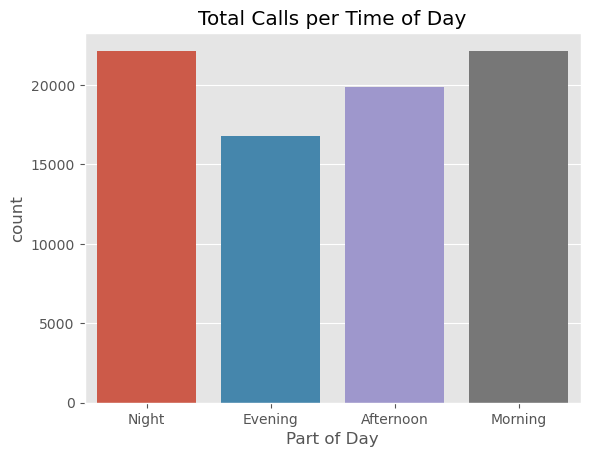

In [32]:
# Count Plot for Calls during the day
ax = sns.countplot(x ='Part_of_Day', 
              data = df)
ax.set_xlabel('Part of Day')
ax.set_title('Total Calls per Time of Day')
plt.show()

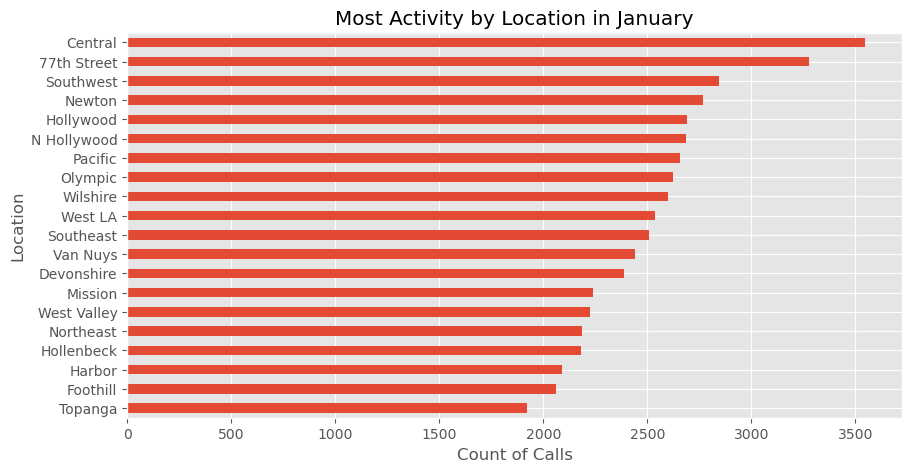

In [33]:
#Query outside and rampart out of the data
# groupby location 
# Counting info grouped
# Sort count by asc
ax = df.query('Location != ["Outside", "Rampart"]') \
    .groupby('Location')['Call_Type_Text'] \
    .agg(['count']) \
    .query('count > 100') \
    .sort_values('count')['count'] \
    .plot(kind = 'barh', figsize = (10,5), title = 'Most Activity by Location in January')
ax.set_xlabel('Count of Calls')
plt.show()

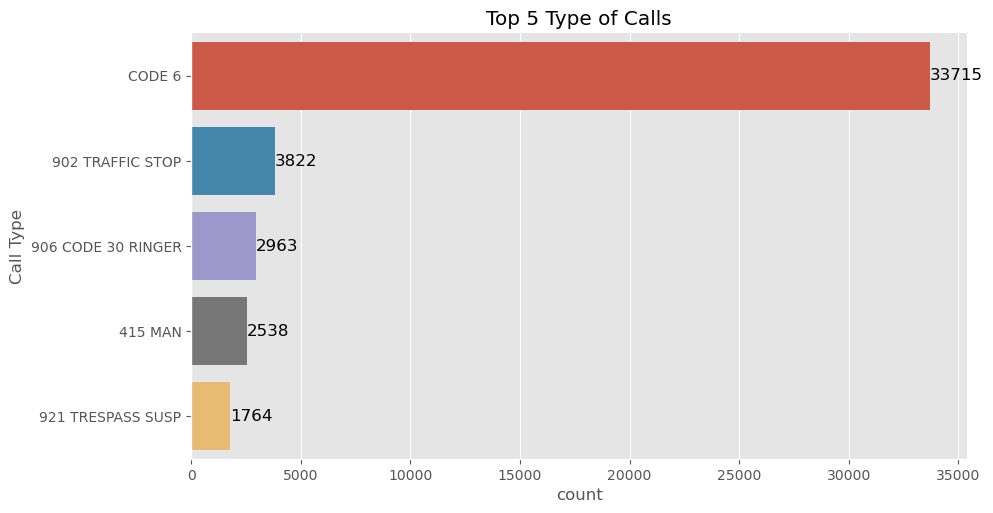

In [34]:
ax = sns.catplot(y= 'Call_Type_Text', 
            data = df, 
            kind = 'count', 
            order = df['Call_Type_Text'].value_counts().index[:5],    # filtering using value counts and an index on order
            aspect = 2).set(title = 'Top 5 Type of Calls')
ax.set_ylabels('Call Type')
for c in ax.axes.flat:
    c.bar_label(c.containers[0], fontsize=12)   #for loop to add data labels